# Dataset Exploration
🔍 Before we actually start building our model we're exploring the dataset in this notebook.

## Paths

In [ ]:
import os

# 🔧 Paths 
BASE_DIR = 'your base path here'  # Replace with your actual base path

SEG_IMG_DIR = os.path.join(BASE_DIR, 'A. Segmentation/1. Original Images/a. Training Set')
MASK_BASE_DIR = os.path.join(BASE_DIR, 'A. Segmentation/2. All Segmentation Groundtruths/a. Training Set')
GRADE_IMG_DIR = os.path.join(BASE_DIR, 'B. Disease Grading/1. Original Images/a. Training Set')
DG_CSV = os.path.join(BASE_DIR, 'B. Disease Grading/2. Groundtruths', 'a. IDRiD_Disease Grading_Training Labels.csv')


# Explore Fundus images

🔍 Exploring Segmentation Images:


,Title,Shape,Min Pixel,Max Pixel,Mean Pixel
0,IDRiD_01.jpg,"(2848, 4288, 3)",0,255,73.62
1,IDRiD_02.jpg,"(2848, 4288, 3)",0,255,40.42
2,IDRiD_03.jpg,"(2848, 4288, 3)",0,255,68.96
3,IDRiD_04.jpg,"(2848, 4288, 3)",0,255,49.46
4,IDRiD_05.jpg,"(2848, 4288, 3)",0,255,73.27


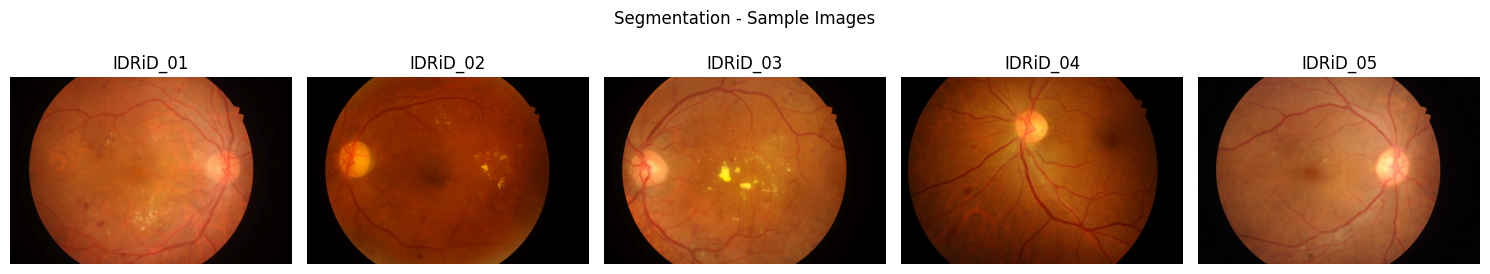

🔍 Exploring Disease Grading Images:


,Title,Shape,Min Pixel,Max Pixel,Mean Pixel
0,IDRiD_001.jpg,"(2848, 4288, 3)",0,255,62.90
1,IDRiD_002.jpg,"(2848, 4288, 3)",0,255,62.12
2,IDRiD_003.jpg,"(2848, 4288, 3)",0,255,49.13
3,IDRiD_004.jpg,"(2848, 4288, 3)",0,255,56.66
4,IDRiD_005.jpg,"(2848, 4288, 3)",0,255,68.07


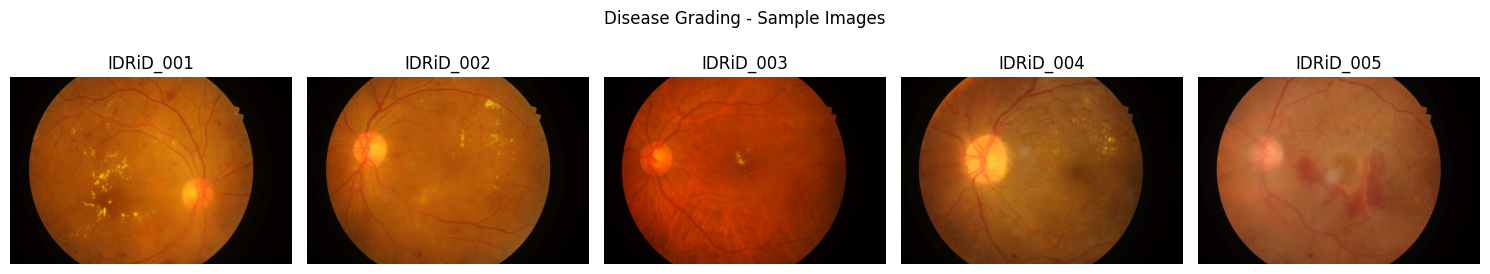

In [ ]:
import os
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import numpy as np
import pandas as pd


# 📊 Helper to show image info
def image_stats(image_np, title):
    return {
        "Title": title,
        "Shape": str(image_np.shape),
        "Min Pixel": image_np.min(),
        "Max Pixel": image_np.max(),
        "Mean Pixel": round(image_np.mean(), 2)
    }



# 👁️ Show a few images from each
def show_images(folder_path, title, num=5):
    files = sorted(os.listdir(folder_path))[:num]
    stats_list = []

    plt.figure(figsize=(15, 3))
    for i, file in enumerate(files):
        img_path = os.path.join(folder_path, file)
        img = np.array(Image.open(img_path))
        stats_list.append(image_stats(img, file))

        plt.subplot(1, num, i + 1)
        plt.imshow(img)
        plt.axis('off')
        plt.title(file.split('.')[0])
    
    # Display all stats as one table
    df = pd.DataFrame(stats_list)
    display(df)

    plt.suptitle(f"{title} - Sample Images")
    plt.tight_layout()
    plt.show()


# 🧪 View Segmentation Images
print("🔍 Exploring Segmentation Images:")
show_images(SEG_IMG_DIR, "Segmentation")

# 🧪 View Grading Images
print("🔍 Exploring Disease Grading Images:")
show_images(GRADE_IMG_DIR, "Disease Grading")


# Segmentation Masks Exploration

## File names and patterns

In [17]:
import os

# 📁 Define paths
FOLDERS = {
    "Fundus Images": SEG_IMG_DIR,
    "Microaneurysms": os.path.join(MASK_BASE_DIR,'1. Microaneurysms'),
    "Haemorrhages": os.path.join(MASK_BASE_DIR,'2. Haemorrhages'),
    "Hard Exudates": os.path.join(MASK_BASE_DIR,'3. Hard Exudates'),
    "Soft Exudates": os.path.join(MASK_BASE_DIR,'4. Soft Exudates'),
    "Optic Disc": os.path.join(MASK_BASE_DIR,'5. Optic Disc'),
}

# 🔍 Walk through each folder and list 5 files
for name, path in FOLDERS.items():
    print(f"\n📂 {name}:")
    try:
        count = 0
        for root, _, files in os.walk(path):
            for file in sorted(files):
                if file.lower().endswith(('.jpg', '.tif')):
                    print(f"   - {file}")
                    count += 1
                if count >= 5:
                    break
            break  # only look at top level
    except Exception as e:
        print(f"   ⚠️ Error accessing {name}: {e}")



📂 Fundus Images:
   - IDRiD_01.jpg
   - IDRiD_02.jpg
   - IDRiD_03.jpg
   - IDRiD_04.jpg
   - IDRiD_05.jpg

📂 Microaneurysms:
   - IDRiD_01_MA.tif
   - IDRiD_02_MA.tif
   - IDRiD_03_MA.tif
   - IDRiD_04_MA.tif
   - IDRiD_05_MA.tif

📂 Haemorrhages:
   - IDRiD_01_HE.tif
   - IDRiD_02_HE.tif
   - IDRiD_03_HE.tif
   - IDRiD_04_HE.tif
   - IDRiD_05_HE.tif

📂 Hard Exudates:
   - IDRiD_01_EX.tif
   - IDRiD_02_EX.tif
   - IDRiD_03_EX.tif
   - IDRiD_04_EX.tif
   - IDRiD_05_EX.tif

📂 Soft Exudates:
   - IDRiD_03_SE.tif
   - IDRiD_08_SE.tif
   - IDRiD_13_SE.tif
   - IDRiD_14_SE.tif
   - IDRiD_17_SE.tif

📂 Optic Disc:
   - IDRiD_01_OD.tif
   - IDRiD_02_OD.tif
   - IDRiD_03_OD.tif
   - IDRiD_04_OD.tif
   - IDRiD_05_OD.tif


## Visualize Fundus with Masks

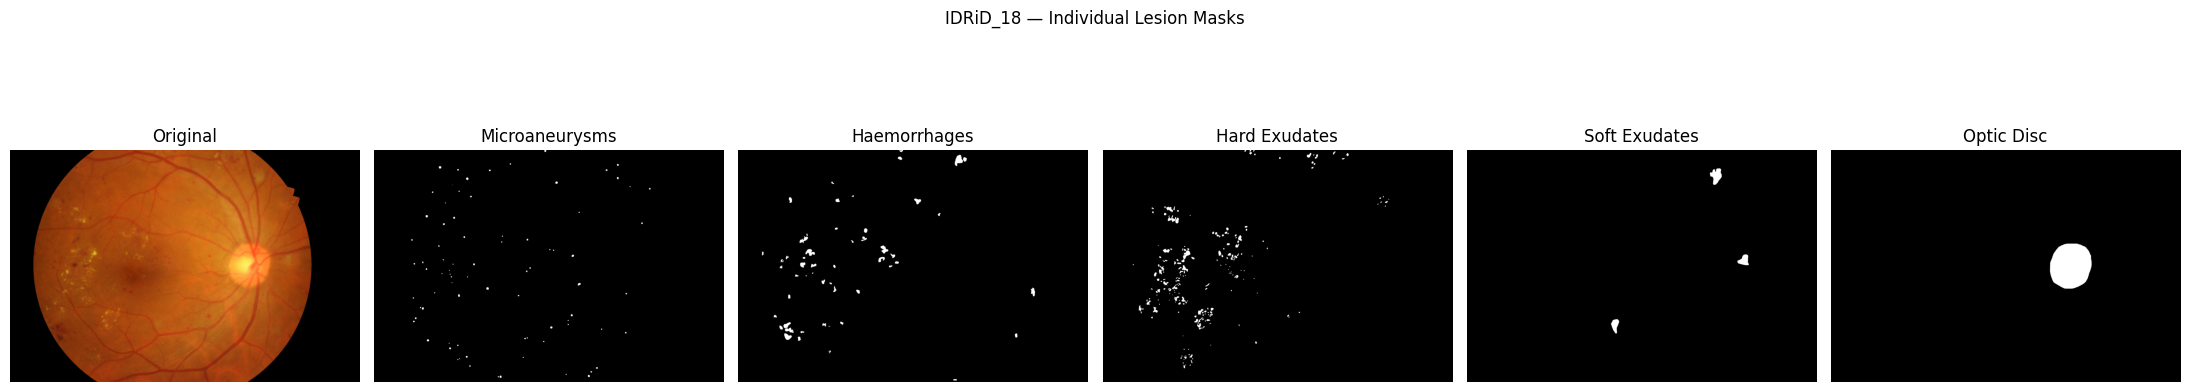

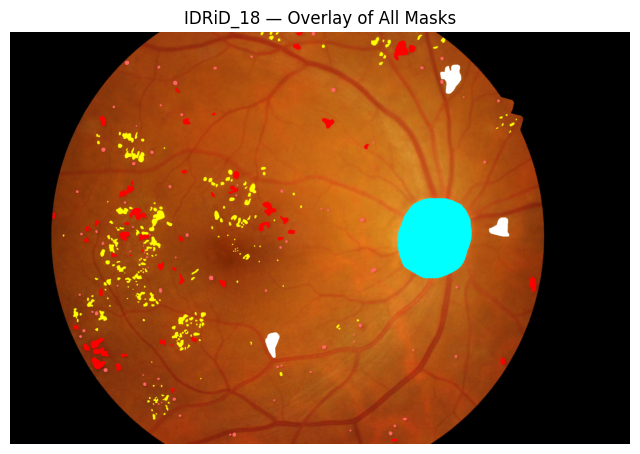

In [22]:

# 🏷️ Suffixes and colors for overlay
MASK_TYPES = {
    'Microaneurysms': {'suffix': '_MA.tif', 'color': (255, 102, 102)},
    'Haemorrhages':   {'suffix': '_HE.tif', 'color': (255, 0, 0)},
    'Hard Exudates':  {'suffix': '_EX.tif', 'color': (255, 255, 0)},
    'Soft Exudates':  {'suffix': '_SE.tif', 'color': (255, 255, 255)},
    'Optic Disc':     {'suffix': '_OD.tif', 'color': (0, 255, 255)},  # Optional
}

IMAGE_SHAPE = (2848, 4288)  # All fundus images and masks are same shape

def load_image(image_id):
    img_path = os.path.join(SEG_IMG_DIR, image_id + '.jpg')
    return np.array(Image.open(img_path))

def load_masks(image_id):
    """Load all lesion masks for a given image ID."""
    masks = {}
    for lesion, cfg in MASK_TYPES.items():
        folder = FOLDERS[lesion]
        mask_path = os.path.join(folder, image_id + cfg['suffix'])
        if os.path.exists(mask_path):
            mask = np.array(Image.open(mask_path).convert("L"))
        else:
            print(f"⚠️ Missing: {lesion} mask for {image_id}")
            mask = np.zeros(IMAGE_SHAPE, dtype=np.uint8)
        masks[lesion] = mask
    return masks

def overlay_masks(image, masks):
    """Overlay all masks on the image using their respective colors."""
    overlay = image.copy()
    for lesion, cfg in MASK_TYPES.items():
        mask = masks[lesion]
        color = np.array(cfg['color'], dtype=np.uint8)
        overlay[mask > 0] = color
    return overlay

def visualize(image_id):
    """Main function to visualize original + individual + overlay masks."""
    image = load_image(image_id)
    masks = load_masks(image_id)

    # 🎭 Plot masks individually
    fig, axes = plt.subplots(1, len(masks) + 1, figsize=(22, 5))
    axes[0].imshow(image)
    axes[0].set_title("Original")
    axes[0].axis("off")

    for i, (lesion, mask) in enumerate(masks.items(), 1):
        axes[i].imshow(mask, cmap='gray')
        axes[i].set_title(lesion)
        axes[i].axis("off")

    plt.suptitle(f"{image_id} — Individual Lesion Masks")
    plt.tight_layout()
    plt.show()

    # 🎨 Overlayed composite view
    overlay = overlay_masks(image, masks)
    plt.figure(figsize=(8, 8))
    plt.imshow(overlay)
    plt.title(f"{image_id} — Overlay of All Masks")
    plt.axis("off")
    plt.show()

# 🧪 Example usage
visualize("IDRiD_18")


---